In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Read in FARS data from csv.  Data prior to 2015 is in sas or dbf format, so a differnt method will need to be used  Accident file contains information about the crashes at a per crash level.  

In [4]:
accident = pd.DataFrame.from_csv('nhtsa-fars-data/FARS2015NationalCSV/accident.csv', index_col=None)
accident.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,...,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,...,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,...,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,...,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,...,99,7,16,88,88,0,0,0,1,0


FARS data by person, which is needed to get driver demographic data, like age.  This table can be combined with accident using the STATE and ST_CASE columns

In [5]:
person = pd.DataFrame.from_csv('nhtsa-fars-data/FARS2015NationalCSV/person.csv', index_col=None)
person.head()

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,127,1,1,2,...,240,0,0,0,0,0,0,7,1,0
1,1,10002,1,1,1,0,83,1,1,22,...,2213,0,0,0,0,0,0,7,1,0
2,1,10003,1,1,1,0,11,1,1,1,...,125,0,0,0,0,0,0,7,2,0
3,1,10003,1,1,2,0,11,1,1,1,...,8888,999,99,0,0,0,8,0,0,0
4,1,10004,1,1,1,0,45,4,1,0,...,57,0,0,0,0,0,0,7,1,0


Import census data, 2011-2015

In [8]:
census = pd.DataFrame.from_csv('census_data/cc-est2015-subset.csv', index_col=None, encoding = 'utf-8')
census.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077


## Exploratory analysis

Q1: Number of accidents per state

    STATE   ACC
0       1   783
1       2    60
2       4   810
3       5   472
4       6  2925
5       8   506
6       9   253
7      10   122
8      11    23
9      12  2699
10     13  1327
11     15    86
12     16   198
13     17   914
14     18   756
15     19   282
16     20   322
17     21   694
18     22   674
19     23   144
20     24   472
21     25   291
22     26   893
23     27   375
24     28   604
25     29   802
26     30   204
27     31   218
28     32   296
29     33   103
30     34   522
31     35   269
32     36  1046
33     37  1275
34     38   111
35     39  1029
36     40   588
37     41   412
38     42  1102
39     44    41
40     45   909
41     46   115
42     47   884
43     48  3124
44     49   256
45     50    50
46     51   711
47     53   516
48     54   246
49     55   523
50     56   129


(array([ 11.,  11.,   4.,   6.,   5.,   6.,   3.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.]),
 array([   23.  ,   178.05,   333.1 ,   488.15,   643.2 ,   798.25,
          953.3 ,  1108.35,  1263.4 ,  1418.45,  1573.5 ,  1728.55,
         1883.6 ,  2038.65,  2193.7 ,  2348.75,  2503.8 ,  2658.85,
         2813.9 ,  2968.95,  3124.  ]),
 <a list of 20 Patch objects>)

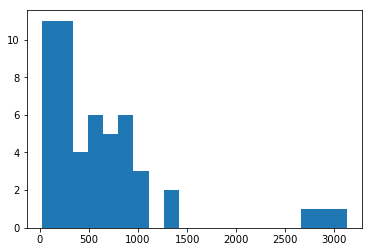

In [47]:
a = accident
acc_state = a.groupby(a.STATE).size().to_frame().reset_index()
acc_state.columns = ['STATE', 'ACC']
print(acc_state)
plt.hist(acc_state.ACC, normed=False, bins=20)

Want to adjust by state population to get accidents per capita

In [52]:
#summarize population by state)
c = census
#filter for year == 8, which is 2015 estimate(most recent and corresponds with accident data)
#and age group 0, which is total
c15 = c[(c['YEAR'] == 8) & (c['AGEGRP'] == 0)]
pop_state = c15.groupby(c15.STATE)[['TOT_POP']].sum().reset_index()
pop_state.head()

,STATE,TOT_POP
0,1,4858979
1,2,738432
2,4,6828065
3,5,2978204
4,6,39144818


In [50]:
#combine with accident data 
acc_pop =  pd.merge(acc_state, pop_state, how='left', on=['STATE'])
acc_pop.head()


,STATE,ACC,TOT_POP
0,1,783,9717958
1,2,60,1476864
2,4,810,13656130
3,5,472,5956408
4,6,2925,78289636


    STATE   ACC   TOT_POP    POP_MIL     ACC_MIL
0       1   783   9717958   9.717958   80.572482
1       2    60   1476864   1.476864   40.626625
2       4   810  13656130  13.656130   59.314022
3       5   472   5956408   5.956408   79.242389
4       6  2925  78289636  78.289636   37.361267
5       8   506  10913148  10.913148   46.366090
6       9   253   7181772   7.181772   35.228075
7      10   122   1891868   1.891868   64.486529
8      11    23   1344456   1.344456   17.107291
9      12  2699  40542544  40.542544   66.572043
10     13  1327  20429720  20.429720   64.954390
11     15    86   2863206   2.863206   30.036260
12     16   198   3309860   3.309860   59.821261
13     17   914  25719990  25.719990   35.536561
14     18   756  13239360  13.239360   57.102458
15     19   282   6247798   6.247798   45.135902
16     20   322   5823282   5.823282   55.295279
17     21   694   8850184   8.850184   78.416449
18     22   674   9341448   9.341448   72.151555
19     23   144   26

(array([ 3.,  0.,  3.,  3.,  5.,  5.,  4.,  3.,  4.,  3.,  8.,  1.,  2.,
         3.,  0.,  0.,  1.,  1.,  1.,  1.]),
 array([  17.10729098,   21.75433469,   26.40137841,   31.04842212,
          35.69546584,   40.34250955,   44.98955327,   49.63659698,
          54.28364069,   58.93068441,   63.57772812,   68.22477184,
          72.87181555,   77.51885927,   82.16590298,   86.81294669,
          91.45999041,   96.10703412,  100.75407784,  105.40112155,
         110.04816527]),
 <a list of 20 Patch objects>)

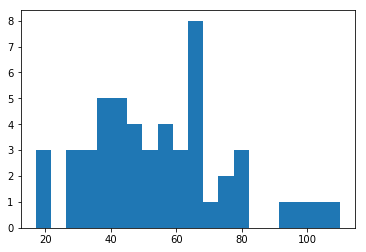

In [61]:
#make population in millions
acc_pop = acc_pop.assign(POP_MIL = pd.Series(acc_pop.TOT_POP / 1000000).values)
#make accidents per million column
acc_pop = acc_pop.assign(ACC_MIL = pd.Series(acc_pop.ACC / acc_pop.POP_MIL).values)
print(acc_pop)

plt.hist(acc_pop.ACC_MIL, normed=False, bins=20)